PySAGA-cmd is a Python package that can be used to run SAGA GIS tools. It does so by passing command-line arguments to the **saga_cmd** executable.

In order to use the package, you need to have SAGA GIS installed somewhere on your computer and you need to know the location of the **saga_cmd** file. The **saga_cmd** file can be usually be found in the following directories:

Windows:

- C:/Program Files/SAGA
- C:/Program Files/SAGA-GIS
- C:/Program Files (x86)/SAGA-GIS
- C:/SAGA-GIS
- C:/OSGeo4W
- C:/OSGeo4W64

Linux:
- /usr

MacOS:
- /Applications/SAGA.app/Contents/MacOS
- /usr/local/bin
- /Applications/QGIS.app/Contents/MacOS/bin

In [1]:
from PySAGA_cmd import (
    SAGA,
    get_sample_dem
)

In [2]:
# For Linux, saga_cmd can be usually found in path.
# Replace 'saga_cmd' with the path to the 'saga_cmd' file.
saga_cmd_path = 'saga_cmd'

# Instantiate the environment.
saga = SAGA(saga_cmd=saga_cmd_path)
saga.version

Version(major=8, minor=5, patch=1)

If you don't know the path to the **saga_cmd** file, you can also not provide it and PySAGA-cmd will try to find it's location. Like in the example below.

In [3]:
saga = SAGA()
saga.version

Path to "saga_cmd" was not provided. Attempting to find it.
saga_cmd found at "saga_cmd".


Version(major=8, minor=5, patch=1)

SAGA GIS contains libraries which contain tools. The following code cell prints out the available libraries which you can choose from.

In [4]:
print(saga.execute().stdout)

____________________________

   #####   ##   #####    ##
  ###     ###  ##       ###
   ###   # ## ##  #### # ##
    ### ##### ##    # #####
 ##### #   ##  ##### #   ##
____________________________

SAGA Version: 8.5.1


82 loaded tool libraries (777 tools):
 - vis_3d_viewer
 - tin_tools
 - table_tools
 - table_calculus
 - ta_slope_stability
 - ta_profiles
 - ta_preprocessor
 - ta_morphometry
 - ta_lighting
 - ta_hydrology
 - ta_compound
 - ta_cliffmetrics
 - ta_channels
 - statistics_regression
 - statistics_points
 - statistics_kriging
 - statistics_grid
 - sim_rivflow
 - sim_qm_of_esp
 - sim_landscape_evolution
 - sim_ihacres
 - sim_hydrology
 - sim_geomorphology
 - sim_fire_spreading
 - sim_erosion
 - sim_ecosystems_hugget
 - sim_cellular_automata
 - sim_air_flow
 - shapes_transect
 - shapes_tools
 - shapes_polygons
 - shapes_points
 - shapes_lines
 - shapes_grid
 - pointcloud_tools
 - pj_proj4
 - pj_geotrans
 - pj_georeference
 - io_webservices
 - io_virtual
 - io_table
 - io_sha

Let's say we want to choose the *grid_stats* library. We would do the following:

In [5]:
grid_stats = saga / 'statistics_grid'
grid_stats

Library(saga=SAGA(saga_cmd=SAGACMD(path=PosixPath('saga_cmd')), version=Version(major=8, minor=5, patch=1)), library='statistics_grid')

To see which tools are contained within the *grid_stats* library, we can do the following:

In [6]:
print(grid_stats.execute().stdout)

____________________________

   #####   ##   #####    ##
  ###     ###  ##       ###
   ###   # ## ##  #### # ##
    ### ##### ##    # #####
 ##### #   ##  ##### #   ##
____________________________

SAGA Version: 8.5.1


Library:	Grids
Category:	Spatial and Geostatistics
File:	/usr/local/lib/saga/libstatistics_grid.so
Description:
Tools for spatial and geostatistical analyses.

Tools:
 [0]	Fast Representativeness
 [1]	Focal Statistics
 [2]	Representativeness (Grid)
 [3]	Radius of Variance (Grid)
 [4]	Statistics for Grids
 [5]	Zonal Grid Statistics
 [6]	Directional Statistics for Single Grid
 [7]	Global Moran's I for Grids
 [8]	Principal Component Analysis
 [9]	Multi-Band Variation
 [10]	Inverse Principal Components Rotation
 [11]	Longitudinal Grid Statistics
 [12]	Meridional Grid Statistics
 [13]	Save Grid Statistics to Table
 [14]	Categorical Coincidence
 [15]	Focal PCA on a Grid
 [16]	Statistics for Grids from Files
 [17]	Build Statistics for Grids
 [18]	Evaluate Statistics for Grid

To choose a tool, we can either use the index or the name.

In [7]:
hist = grid_stats / 'Grid Histogram'

#  hist = grid_stats / 21

hist

Tool(library=Library(saga=SAGA(saga_cmd=SAGACMD(path=PosixPath('saga_cmd')), version=Version(major=8, minor=5, patch=1)), library='statistics_grid'), tool='Grid Histogram', parameters={})

To see which parameters you can pass to the tool, run the following code cell.

In [8]:
print(hist.execute().stdout)

____________________________

   #####   ##   #####    ##
  ###     ###  ##       ###
   ###   # ## ##  #### # ##
    ### ##### ##    # #####
 ##### #   ##  ##### #   ##
____________________________

SAGA Version: 8.5.1

____________________________
library path: /usr/local/lib/saga/
library name: libstatistics_grid
library     : statistics_grid
tool        : Grid Histogram
identifier  : 21
author      : O.Conrad (c) 2022
processors  : 4 [4]
____________________________


Usage: saga_cmd statistics_grid 21 [-GRID <str>] [-HISTOGRAM <str>] [-CLASSIFY <str>] [-BINS <num>] [-RANGE_MIN <double>] [-RANGE_MAX <double>] [-LUT <str>] [-UNCLASSED <str>] [-PARALLEL <str>] [-MAXSAMPLES <double>]
  -GRID:<str>         	Grid
	Grid, input
  -HISTOGRAM:<str>    	Histogram
	Table, output
  -CLASSIFY:<str>     	Classification
	Choice
	Available Choices:
	[0] value range and number of classes
	[1] lookup table
	Default: 0
  -BINS:<num>         	Number of Classes
	Integer
	Minimum: 1
	Default: 64
  -RANG

Let's run our first tool. To do so, pass the arguments (at least the ones that are mandatory) to the *execute* method. The *get_sample_dem* function returns a sample raster file provided by the PySAGA_cmd package.

In [9]:
sample_grid = get_sample_dem()
output = hist.execute(
    grid=sample_grid,
    histogram='temp',
    bins=10
)

output.files['histogram']

PosixPath('/tmp/tmp3smfxmcp/histogram_1713165254')

Since we passed **temp** to the **histogram** argument, the output is located in your temporary files directory. Let's open the file and see it's contents. We will parse it's contents using the built-in **csv** library.

In [10]:
import csv


with open(  # type: ignore
    file=output.files['histogram'],
    mode='r',
    encoding='utf-8'
) as file:
    reader = csv.reader(
        [string for string in file.readlines()],
        dialect='excel-tab'
    )

def supports_float(value: str):
    try:
        float(value)
        return True
    except:
        return False

for i, row in enumerate(reader):
    rounded = [
        str(round(float(number), 1))
        if supports_float(number)
        else number
        for number in row
    ]
    print(
        f'{rounded[1]:<20}'
        f'{rounded[2]:<10}'
        f'{rounded[3]:<10}'
        f'{rounded[4]:<10}'
        f'{rounded[5]:<10}'
    )

Class               Minimum   Maximum   Count     Cumulative
160 - 186.2         160.0     186.2     15155.0   15155.0   
186.2 - 212.4       186.2     212.4     25062.0   40217.0   
212.4 - 238.6       212.4     238.6     26497.0   66714.0   
238.6 - 264.8       238.6     264.8     24908.0   91622.0   
264.8 - 291         264.8     291.0     18860.0   110482.0  
291 - 317.2         291.0     317.2     13063.0   123545.0  
317.2 - 343.4       317.2     343.4     9540.0    133085.0  
343.4 - 369.6       343.4     369.6     5935.0    139020.0  
369.6 - 395.8       369.6     395.8     1464.0    140484.0  
395.8 - 422         395.8     422.0     276.0     140760.0  


Below is another example but it uses another library to compute the hillshade of the sample grid provided by the PySAGA-cmd package.

In [11]:
hillshade = saga / 'ta_lighting' / 'Analytical Hillshading'
output = hillshade.execute(
    elevation=sample_grid,
    method=5,
    shade='temp.tif',
    unit=1,
    verbose=True
)

print(output.files)
print(output.rasters)

-------------------------
ta_lighting / Analytical Hillshading
    -ELEVATION=/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/assets/DEM_30m.tif -METHOD=5 -SHADE=/tmp/tmp3smfxmcp/shade_1713165275.tif -UNIT=1

[████████████████████████████████████████████████████████████] 100/100% | Elapsed time: 0:00:02        
{'elevation': Raster(path=PosixPath('/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/assets/DEM_30m.tif')), 'shade': Raster(path=PosixPath('/tmp/tmp3smfxmcp/shade_1713165275.tif'))}
{'elevation': Raster(path=PosixPath('/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/assets/DEM_30m.tif')), 'shade': Raster(path=PosixPath('/tmp/tmp3smfxmcp/shade_1713165275.tif'))}


In [12]:
print('The parameters of the tool:', hillshade.parameters)
print('The command that is used to generate the output:', hillshade.command)

The parameters of the tool: -ELEVATION=/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/assets/DEM_30m.tif -METHOD=5 -SHADE=/tmp/tmp3smfxmcp/shade_1713165275.tif -UNIT=1
The command that is used to generate the output: "saga_cmd" "ta_lighting" "Analytical Hillshading" "-ELEVATION=/media/alex/alex/python-modules-packages-utils/PySAGA_cmd/PySAGA_cmd/assets/DEM_30m.tif" "-METHOD=5" "-SHADE=/tmp/tmp3smfxmcp/shade_1713165275.tif" "-UNIT=1"


Notice how we can pass in **verbose=True** to get a nice progress bar.

To run the following code cell, you need to also have the extra dependencies installed. They can be installed using the command line

```sh
pip install PySAGA_cmd[extras]
```

<Axes: >

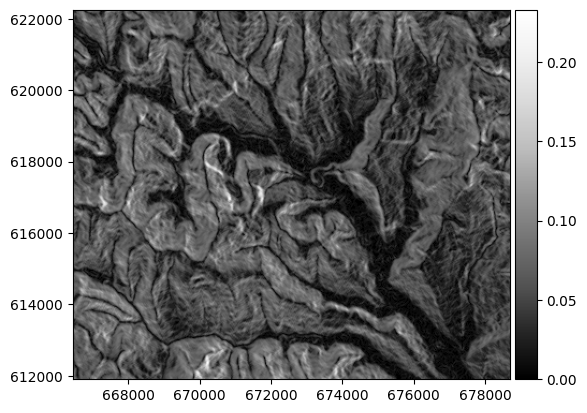

In [13]:
output.rasters['shade'].plot(cbar=True)